# 2-12. 프로젝트 1 : 손수 설계하는 선형회귀, 당뇨병 수치를 맞춰보자!


# (1) 데이터 가져오기
***
* `sklearn.datasets`의 `load_diabetes`에서 데이터를 가져와주세요.
* `diabetes`의 `data`를 `df_X`에, `target`을 `df_y`에 저장해주세요.

In [29]:
from sklearn.datasets import load_diabetes

diabetes = load_diabetes()          # 내장되어있는 라이브러리를 변수에 저장

print(dir(diabetes))              # dir()는 객체가 어떤 변수와 메서드를 가지고 있는지 나열함

df_X = diabetes.data                # diabetes의 data를 df_X에 저장
df_y = diabetes.target              # diabetes의 target를 df_y에 저장


print(df_X.shape)                   # df_X 의 크기 확인,   442행 10열의 데이터
print(df_y.shape)                   # df_y 의 크기 확인     
print(diabetes.feature_names)       # diagbetes의 feature name 확인
print(diabetes.DESCR)

['DESCR', 'data', 'data_filename', 'data_module', 'feature_names', 'frame', 'target', 'target_filename']
(442, 10)
(442,)
['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']
.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-dens

# (2) 모델에 입력할 데이터 X 준비하기
***
* `df_X`에 있는 값들을 numpy array로 변환해서 저장해주세요.W

In [30]:
import numpy as np                 # numpy 라이브러리를 불러오기

print(type(df_X))                   # numpy array로 변환을 안해도 데이터가 어레이로 되어있음.

df_X = np.array(df_X)              #  df_X의 값들을 numpy array로 변환해서 저장
print(df_X)
print(type(df_X))  
X = df_X
y = df_y

<class 'numpy.ndarray'>
[[ 0.03807591  0.05068012  0.06169621 ... -0.00259226  0.01990842
  -0.01764613]
 [-0.00188202 -0.04464164 -0.05147406 ... -0.03949338 -0.06832974
  -0.09220405]
 [ 0.08529891  0.05068012  0.04445121 ... -0.00259226  0.00286377
  -0.02593034]
 ...
 [ 0.04170844  0.05068012 -0.01590626 ... -0.01107952 -0.04687948
   0.01549073]
 [-0.04547248 -0.04464164  0.03906215 ...  0.02655962  0.04452837
  -0.02593034]
 [-0.04547248 -0.04464164 -0.0730303  ... -0.03949338 -0.00421986
   0.00306441]]
<class 'numpy.ndarray'>


# (3) 모델에 예측할 데이터 y 준비하기
***
* `df_y`에 있는 값들을 numpy array로 변환해서 저장해주세요.

In [31]:
print(type(df_y))            # numpy array로 변환을 안해도 데이터가 어레이로 되어있음.              

df_y = np.array(df_y)       #  df_y의 값들을 numpy array로 변환해서 저장      

print(df_y)

print(type(df_y))

<class 'numpy.ndarray'>
[151.  75. 141. 206. 135.  97. 138.  63. 110. 310. 101.  69. 179. 185.
 118. 171. 166. 144.  97. 168.  68.  49.  68. 245. 184. 202. 137.  85.
 131. 283. 129.  59. 341.  87.  65. 102. 265. 276. 252.  90. 100.  55.
  61.  92. 259.  53. 190. 142.  75. 142. 155. 225.  59. 104. 182. 128.
  52.  37. 170. 170.  61. 144.  52. 128.  71. 163. 150.  97. 160. 178.
  48. 270. 202. 111.  85.  42. 170. 200. 252. 113. 143.  51.  52. 210.
  65. 141.  55. 134.  42. 111.  98. 164.  48.  96.  90. 162. 150. 279.
  92.  83. 128. 102. 302. 198.  95.  53. 134. 144. 232.  81. 104.  59.
 246. 297. 258. 229. 275. 281. 179. 200. 200. 173. 180.  84. 121. 161.
  99. 109. 115. 268. 274. 158. 107.  83. 103. 272.  85. 280. 336. 281.
 118. 317. 235.  60. 174. 259. 178. 128.  96. 126. 288.  88. 292.  71.
 197. 186.  25.  84.  96. 195.  53. 217. 172. 131. 214.  59.  70. 220.
 268. 152.  47.  74. 295. 101. 151. 127. 237. 225.  81. 151. 107.  64.
 138. 185. 265. 101. 137. 143. 141.  79. 292. 178.  9

# (4) train 데이터와 test 데이터로 분리하기
***
`X`와 `y` 데이터를 각각 train 데이터와 test 데이터로 분리해주세요.

In [32]:
from sklearn.model_selection import train_test_split   # sklearn.model_selection 라이브러리에서  train_test_split 사용

X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.2, 
                                                    random_state=32 
)
print(X_train.shape, y_train.shape)                  #  학습데이터 크기 확인
print(X_test.shape, y_test.shape)                    # 테스트 데이터 크기 확인

(353, 10) (353,)
(89, 10) (89,)


# (5) 모델 준비하기
***
* 입력 데이터 개수에 맞는 가중치 `W`와 `b`를 준비해주세요.
* 모델 함수를 구현해주세요.

In [33]:
import numpy as np

W = np.random.rand(10)           # W가중치에 10개의 랜덤한 값을 담음.
b = np.random.rand()             # b가중치에 1개의 랜덤한 값을 담음.

W, b

(array([0.45760026, 0.49214922, 0.64808798, 0.49110331, 0.24605921,
        0.29265455, 0.49816916, 0.27571259, 0.61006448, 0.09196307]),
 0.20897461267025974)

In [34]:
# 모델 함수 구현
def model(X, W, b):                       # 함수 선언
    predictions = 0                       # 예측값의 초기값은 0
    for i in range(10):                  # y = w1x1 + w2x2 + w3x3 + w4x4 + w5x5 + w6x6 + w7x7 + w8x8 + w9x9 + w10x10 + b
        predictions += X[:, i] * W[i]
    predictions += b
    return predictions


# (6) 손실함수 loss 정의하기
***
* 손실함수를 MSE 함수로 정의해주세요.


In [35]:
def MSE(a, b):
    mse = ((a - b) ** 2).mean()  # 두 값의 차이의 제곱의 평균
    return mse

In [36]:
def loss(X, W, b, y):                    # loss 함수 선언
    predictions = model(X, W, b)         # 모델 함수
    L = MSE(predictions, y)              # 모델이 예측한 값과 실제 정답값의 차이를 비교, L 값이 작을수록 좋음
    return L


# (7) 기울기를 구하는 gradient 함수 구현하기
***
기울기를 계산하는 `gradient` 함수를 구현해주세요.

In [37]:
def gradient(X, W, b,y):
    # N은 가중치의 개수
    N = len(W)
    
    # y_pred 준비
    y_pred = model(X, W, b)
    
    # 공식에 맞게 gradient 계산
    dW = 1/N * 2 * X.T.dot(y_pred - y)
        
    # b의 gradient 계산
    db = 2 * (y_pred - y).mean()
    return dW, db

In [38]:
dW, db = gradient(X, W, b, y)
print("dW:", dW)
print("db:", db)

dW: [ -60.60308969  -13.7808929  -189.61754383 -142.67005347  -68.36181161
  -56.10708008  127.71604097 -139.1163904  -182.92280889 -123.60387194]
db: -303.84901910045136


# (8) 하이퍼 파라미터인 학습률 설정하기
***
* 학습률, learning rate 를 설정해주세요
* 만약 학습이 잘 되지 않는다면 learning rate 값을 한번 여러 가지로 설정하며 실험해 보세요.

In [44]:
LEARNING_RATE = 0.01              # 학습률에 따라 loss값이 달라짐.

TypeError: float() argument must be a string or a number, not 'function'

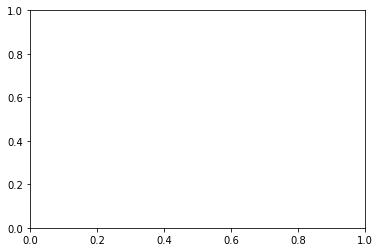

In [46]:
import matplotlib.pyplot as plt
plt.plot(loss)
plt.show()

# (9) 모델 학습하기
***
* 정의된 손실함수와 기울기 함수로 모델을 학습해주세요.
* loss값이 충분히 떨어질 때까지 학습을 진행해주세요.
* 입력하는 데이터인 `X`에 들어가는 특성 컬럼들을 몇 개 빼도 괜찮습니다. 다양한 데이터로 실험해 보세요.

In [47]:
losses = []

for i in range(1, 10001):
    dW, db = gradient(X_train, W, b, y_train)
    W -= LEARNING_RATE * dW
    b -= LEARNING_RATE * db
    L = loss(X_train, W, b, y_train)
    losses.append(L)
    if i % 10 == 0:
        print('Iteration %d : Loss %0.4f' % (i, L))

Iteration 10 : Loss 21538.4192
Iteration 20 : Loss 16076.9689
Iteration 30 : Loss 12376.6928
Iteration 40 : Loss 9857.3897
Iteration 50 : Loss 8131.1911
Iteration 60 : Loss 6938.6714
Iteration 70 : Loss 6106.1971
Iteration 80 : Loss 5517.4523
Iteration 90 : Loss 5094.4266
Iteration 100 : Loss 4784.7204
Iteration 110 : Loss 4553.0664
Iteration 120 : Loss 4375.6663
Iteration 130 : Loss 4236.4065
Iteration 140 : Loss 4124.3294
Iteration 150 : Loss 4031.9414
Iteration 160 : Loss 3954.0823
Iteration 170 : Loss 3887.1667
Iteration 180 : Loss 3828.6769
Iteration 190 : Loss 3776.8215
Iteration 200 : Loss 3730.3066
Iteration 210 : Loss 3688.1811
Iteration 220 : Loss 3649.7325
Iteration 230 : Loss 3614.4162
Iteration 240 : Loss 3581.8070
Iteration 250 : Loss 3551.5662
Iteration 260 : Loss 3523.4187
Iteration 270 : Loss 3497.1372
Iteration 280 : Loss 3472.5307
Iteration 290 : Loss 3449.4365
Iteration 300 : Loss 3427.7147
Iteration 310 : Loss 3407.2435
Iteration 320 : Loss 3387.9161
Iteration 330 

In [48]:
W,b

(array([  34.08558999, -273.43155874,  507.55796246,  369.3414292 ,
        -138.00881044,  -44.95195479, -194.11694557,   90.94634945,
         483.87985072,   83.73323141]),
 154.15833495840297)

# (10) test 데이터에 대한 성능 확인하기
***
* test 데이터에 대한 성능을 확인해주세요.

In [49]:
# 학습때 보지 않은 test 데이터에 대한 loss값
prediction = model(X_test, W, b)
mse = loss(X_test, W, b, y_test)
mse

2795.90768596535

# (11) 정답 데이터와 예측한 데이터 시각화하기
***
* x축에는 X 데이터의 첫 번째 컬럼을, y축에는 정답인 target 데이터를 넣어서 모델이 예측한 데이터를 시각화해 주세요.


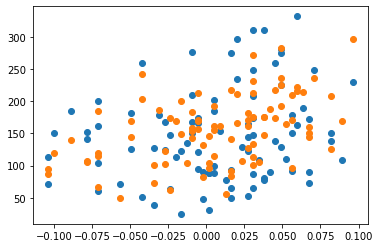

In [50]:
plt.scatter(X_test[:, 0], y_test)
plt.scatter(X_test[:, 0], prediction)
plt.show()

# 2-13. 프로젝트 2 : 날씨 좋은 월요일 오후 세 시, 자전거 타는 사람은 몇 명?


# (1) 데이터 가져오기
* 터미널에서 `~/data/data/bike-sharing-demand` 경로에 `train.csv` 데이터를 train 변수로 가져 옵니다.
* 여기에서 데이터를 상세히 확인할 수 있습니다.

In [51]:
import pandas as pd

train_data = pd.read_csv('/aiffel/data/data/bike-sharing-demand/train.csv')
test_data = pd.read_csv('/aiffel/data/data/bike-sharing-demand/test.csv')
print(train_data.shape)
print(test_data.shape)
train_data.head()
#train_data.info()
#print(test_data)


(10886, 12)
(6493, 9)


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [52]:
print(test_data.head())
print()
print(train_data.info())
print()
print(test_data.info())

              datetime  season  holiday  workingday  weather   temp   atemp  \
0  2011-01-20 00:00:00       1        0           1        1  10.66  11.365   
1  2011-01-20 01:00:00       1        0           1        1  10.66  13.635   
2  2011-01-20 02:00:00       1        0           1        1  10.66  13.635   
3  2011-01-20 03:00:00       1        0           1        1  10.66  12.880   
4  2011-01-20 04:00:00       1        0           1        1  10.66  12.880   

   humidity  windspeed  
0        56    26.0027  
1        56     0.0000  
2        56     0.0000  
3        56    11.0014  
4        56    11.0014  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10

# (2) datetime 컬럼을 datetime 자료형으로 변환하고 연, 월, 일, 시, 분, 초까지 6가지 컬럼 생성하기
***
* to_datetime 활용 : 링크 참조
* pandas datetime extract year month day 키워드로 검색해 보기

In [53]:
import numpy as np
import datetime

# datetime 열을 datetime 속성으로 변경
train_data['datetime'] = pd.to_datetime(train_data['datetime'])
test_data['datetime'] = pd.to_datetime(test_data['datetime'])
# datetime 에서 year, month, day, hour, minute, second 추출해서 새로운 Feature 만들기

train_data['year'] = train_data['datetime'].dt.year
train_data['Month'] = train_data['datetime'].dt.month
train_data['day'] = train_data['datetime'].dt.day
train_data['hour'] = train_data['datetime'].dt.hour
train_data['minute'] = train_data['datetime'].dt.minute
train_data['second'] = train_data['datetime'].dt.second

test_data['year'] = test_data['datetime'].dt.year
test_data['Month'] = test_data['datetime'].dt.month
test_data['day'] = test_data['datetime'].dt.day
test_data['hour'] = test_data['datetime'].dt.hour
test_data['minute'] = test_data['datetime'].dt.minute
test_data['second'] = test_data['datetime'].dt.second


In [54]:
print(train_data.head())


             datetime  season  holiday  workingday  weather  temp   atemp  \
0 2011-01-01 00:00:00       1        0           0        1  9.84  14.395   
1 2011-01-01 01:00:00       1        0           0        1  9.02  13.635   
2 2011-01-01 02:00:00       1        0           0        1  9.02  13.635   
3 2011-01-01 03:00:00       1        0           0        1  9.84  14.395   
4 2011-01-01 04:00:00       1        0           0        1  9.84  14.395   

   humidity  windspeed  casual  registered  count  year  Month  day  hour  \
0        81        0.0       3          13     16  2011      1    1     0   
1        80        0.0       8          32     40  2011      1    1     1   
2        80        0.0       5          27     32  2011      1    1     2   
3        75        0.0       3          10     13  2011      1    1     3   
4        75        0.0       0           1      1  2011      1    1     4   

   minute  second  
0       0       0  
1       0       0  
2       0     

In [55]:
print(test_data.head())

             datetime  season  holiday  workingday  weather   temp   atemp  \
0 2011-01-20 00:00:00       1        0           1        1  10.66  11.365   
1 2011-01-20 01:00:00       1        0           1        1  10.66  13.635   
2 2011-01-20 02:00:00       1        0           1        1  10.66  13.635   
3 2011-01-20 03:00:00       1        0           1        1  10.66  12.880   
4 2011-01-20 04:00:00       1        0           1        1  10.66  12.880   

   humidity  windspeed  year  Month  day  hour  minute  second  
0        56    26.0027  2011      1   20     0       0       0  
1        56     0.0000  2011      1   20     1       0       0  
2        56     0.0000  2011      1   20     2       0       0  
3        56    11.0014  2011      1   20     3       0       0  
4        56    11.0014  2011      1   20     4       0       0  


# (3) year, month, day, hour, minute, second 데이터 개수 시각화하기
***
* sns.countplot 활용해서 시각화하기
* subplot을 활용해서 한 번에 6개의 그래프 함께 시각화하기

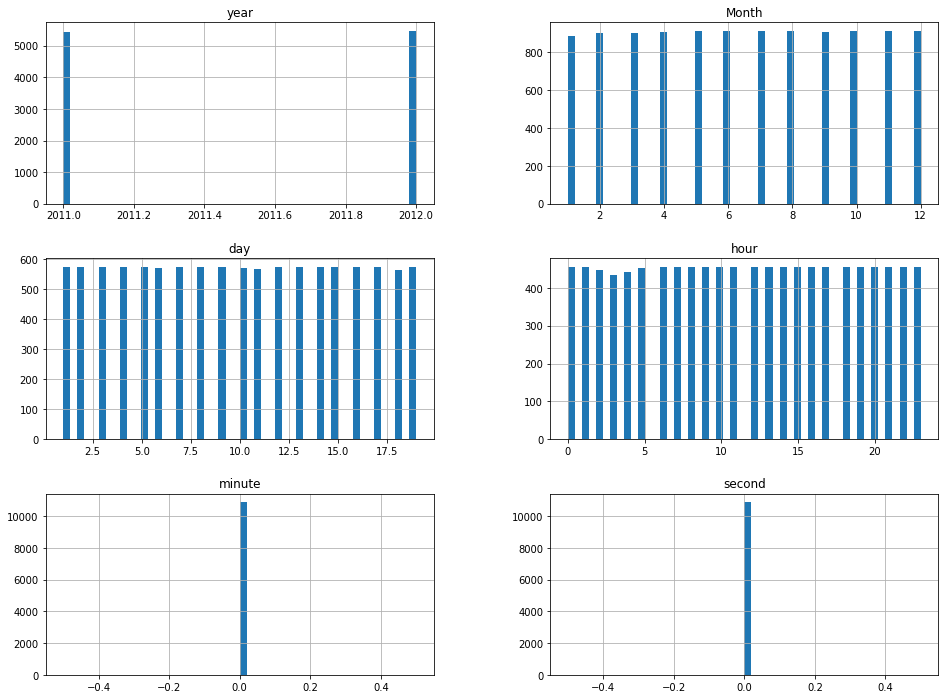

In [56]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(3,2,figsize=(16,12))

train_data[['year','Month','day','hour','minute','second']].hist(bins=50, ax=ax)
plt.show()

# (4) X, y 컬럼 선택 및 train/test 데이터 분리
***
* X에는 문자열 데이터, 쓸모없는 데이터를 제외한 컬럼의 데이터 넣기
* count 값을 맞추고자 하므로, y 변수에 count 컬럼의 데이터 넣기

In [59]:
train_data = train_data.drop(['datetime','casual','registered'], axis=1)
test_data = test_data.drop(['datetime'],axis=1)

# target과 features 구분
target = 'count'
features = train_data.columns.drop(target)

X = train_data[features].copy()
y = train_data[target].copy()

X_test = test_data.copy()

# 데이터를 편리하게 분할해주는 라이브러리 활용
from sklearn.model_selection import train_test_split

# 훈련 데이터의 20%를 검증 데이터로 활용
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=.20, random_state=42)

# (5) LinearRegression 모델 학습
***
* sklearn의 LinearRegression 모델 불러오기 및 학습하기

In [60]:
from sklearn.linear_model import LinearRegression

# 선형 회귀 모델 선언
linear_model = LinearRegression()

# 모델 학습
linear_model.fit(X_train, y_train)

LinearRegression()

# (6) 학습된 모델로 X_test에 대한 예측값 출력 및 손실함수값 계산
***
* 학습된 모델에 X_test를 입력해서 예측값 출력하기
* 모델이 예측한 값과 정답 target 간의 손실함수 값 계산하기
* mse 값과 함께 rmse 값도 계산하기

In [63]:
# 자전거 대여수 예측(검증용 데이터)
y_val_pred = linear_model.predict(X_val)
print(y_val_pred)

y_pred = linear_model.predict(X_test)
print(y_pred) # 예측 결과

MSE(y_val,y_pred)

[248.10627003  48.79765547 200.90676727 ... 309.7528022   38.17030198
 243.62697388]
[-33.76967024 -28.55686835 -20.69327388 ... 320.0795446  338.77442187
 328.32204517]


ValueError: operands could not be broadcast together with shapes (2178,) (6493,) 

# (7) x축은 temp 또는 humidity로, y축은 count로 예측 결과 시각화하기
***
* x축에 X 데이터 중 temp 데이터를, y축에는 count 데이터를 넣어서 시각화하기
* x축에 X 데이터 중 humidity 데이터를, y축에는 count 데이터를 넣어서 시각화하기

<AxesSubplot:xlabel='humidity', ylabel='count'>

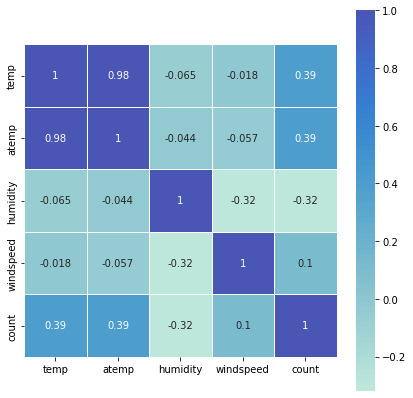

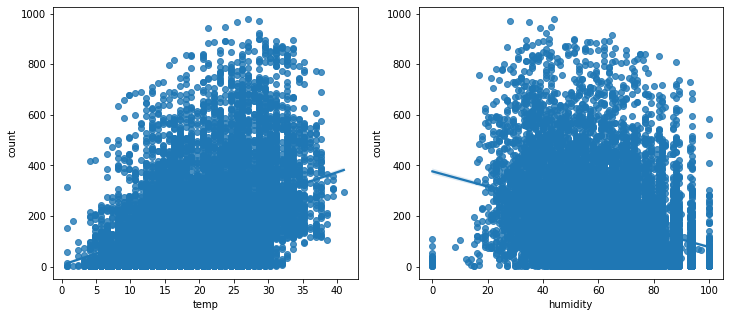

In [80]:
corr = train_data[['temp','atemp','humidity', 'windspeed','count']].corr()


f,axes = plt.subplots(1,1,figsize = (7,7))
sns.heatmap(corr,square=True,annot = True,linewidth = .5,center = 2,ax = axes)

fig,(ax1,ax2) = plt.subplots(ncols=2)
fig.set_size_inches(12,5)
sns.regplot(x="temp",y="count",data=train_data, ax=ax1)

sns.regplot(x="humidity",y="count",data=train_data, ax=ax2)

# 회고
***
아직 데이터에 대한 이해도가 부족하고 인공지능을 학습시키고 학습시킨 데이터로 증명하고 시각화 하는것에 어려움이 많다.

첫번재 프로젝트에서 (2),(3) 파트에 데이터 준비하는 단계에서 numpy array 데이터로 변환하라고 나와있는데 이미 데이터는 넘파이 배열로 데이터 타입이 된 것 같았다.
두번째 프로젝트에서 불필요한 데이터를 제거하고 필요한 데이터를 뽑는 과정도 쉽지 않았다. mse, rmse 값을 구하는 것도 잘 못했다.
더 공부하여서 다음에는 이전보다 더 발전하고 싶다.